<a href="https://colab.research.google.com/github/ofunkey/Time_Series_Data/blob/master/5_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Data**

### **Problem Description**
- Build models to forecast the number of passengers for an airline


##**Time Series Data**

###**What is Time Series?**
- Time series is a sequence of observations **indexed** in **equi-spaced time intervals**. The time order can be hourly, daily, weekly, monthly, quarterly or yearly.

- The simplest example of a time series that all of us come across on a day to day basis is the change in temperature throughout the day or week or month or year.

**Time Series forecasting** is the process of using a statistical model to predict future values of a time series based on past results

- The ability to make predictions based upon historical observations creates a competitive advantage. For example, if an organization has the capacity to better **forecast** the sales quantities of a product, it will be in a more favourable position to optimize inventory levels. This can result in an increased liquidity of the organizations cash reserves, decrease of working capital and improved customer satisfaction by decreasing the backlog of orders.



### **Application of Time Series**
* Financial Analysis − sales forecasting, inventory analysis, stock market analysis, price estimation.

* Weather Analysis − temperature estimation, climate change, seasonal shift recognition, weather forecasting.

* Network Data Analysis − network usage prediction, anomaly or intrusion detection, predictive maintenance.

* Healthcare Analysis − census prediction, insurance benefits prediction, patient monitoring.


###**Components of Time Series:**

- **Trend:** It is the increasing or decreasing behavior of a variable over a **long period of time**. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

- **Seasonality:** The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. An example is an increase in the number of airline passengers during holidays each year. **(over a fixed time)**

- **Cyclical Component:** These are the trends with no set repetition over a particular period of time. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series. **(No fixed time)**

- **Irregular Variation:** These are the fluctuations in the time series data become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random. It is the error in the observations added due to environmental factors. Example, flood, famine, war, earth etc.

A time series may not have a distinct trend but have a seasonality. The opposite can also be true.


###**Models of Time Series Analysis**

|Smoothing Models  |   
|---|
| Moving Average (Simple & Weighted)  |  
| Single Exponential Smoothing   |
| Double Exponential Smoothing  |
| Polynomial Regression  |


|Decompostion Models  |   
|---|
| Models generally used for decomposition of time series into its four components.
It estimate and separate the four types of variations and bring out the relative impact of each on the overall behavior of the time series.  | 
| **ETS Decomposition** is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.  |



| **Additive model**  | **Multiplicative model**  |
|---|---|
| Yt = T + S + C + E  |  Yt = T * S * C * E |   



|**Types of Models**   |   
|---|
| Naive Approach  |  
| Auto Regression Moving Average (ARMA)  |
| Auto Regressive Integrated Moving Average(ARIMA)  |
| Seasonal Auto Regressive Integrated Moving Average(ARIMA)  |
| Vector Auto-Regression(VAR)  |
| Vector Auto-Regression Moving-Average(VARMA)  | 


## Data Loading

**Datasets**

The dataset we will be using is a univariate time series listing the number of passengers boarding an aircraft per month from 1949 to 1960 (over 12 year period). The dataset can be downloaded from the kaggle − https://www.kaggle.com/rakannimer/air-passengers or https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv.

**Let's get started**

In [1]:
# Import library
import warnings

import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10


In [2]:
# Load the data
url_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
airline = pd.read_csv(url_path)


## Data Exploring

Understanding the data, its features and make sense of what the data looks like

In [3]:
# Prints first 5 rows of the DataFrame
airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Prints last 5 rows of the DataFrame
airline.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
# Number of rows and columns of the dataset
airline.shape

(144, 2)

In [6]:
# Prints the index, datatype and memory information. We also get the number of columns, check if null values exist and the data types
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Great!, there are no null values in this dataset. In time series, we make sure there are no null values in the dataset; if there are, we can replace them with either 0 or average or preceding or succeeding values. Replacing is a preferred choice over dropping so that the continuity of the time series is maintained.

In [7]:
# Convert the date from string to datetime, it's time series!
airline['Month'] = pd.to_datetime(airline['Month'])

In [8]:
# Check the data types for 'Month'
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

Now, the data type for month is in datetime format.

In [9]:
# Rename the column
airline = airline.rename(columns = {'Passengers':'Num_of_Passengers'})

In [10]:
# Set date as the index and print first 5 rows to view that month is indexed
airline_index = airline.set_index('Month', inplace=True)
airline.head()

,Num_of_Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
# Summary statistics for numerical column
airline.describe()

,Num_of_Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


**Steps in processing Time Series Data**
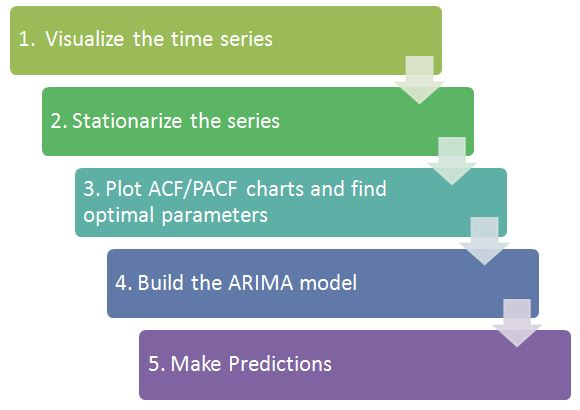

## Time series Steps

### Step 1: Visualize the Time Series

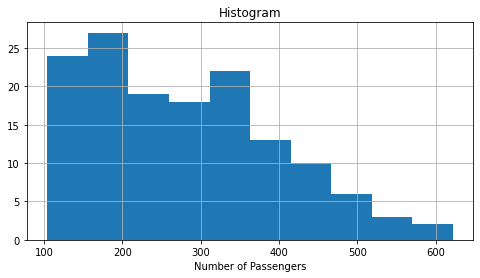

In [12]:
# Plot histogram to show the distribution of the dataset
airline.hist(figsize=(8,4))
plt.xlabel('Number of Passengers')
plt.title('Histogram');

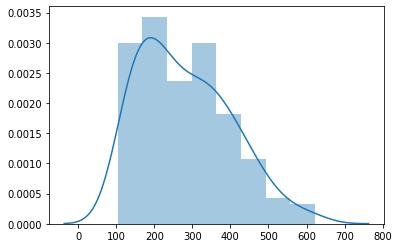

In [13]:
# Show the density distribution
sns.distplot(airline)

From the density plot, we don't have a normal distibution.

In [14]:
# Split our dataset and calculate the mean and variance for each group to compare the values 
split = round(len(airline) / 2)
airline1, airline2 = airline[0:split], airline[split:]
mean1, mean2 = airline1.mean(), airline2.mean()
std1, std2 = airline1.std(), airline2.std()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('Stardard Deviation1=%f, Stardard deviation2=%f' % (std1, std2))

mean1=182.902778, mean2=377.694444
Stardard Deviation1=47.704241, Stardard deviation2=86.439206


The mean and variance look different, so we can say that time series is **non stationary**.

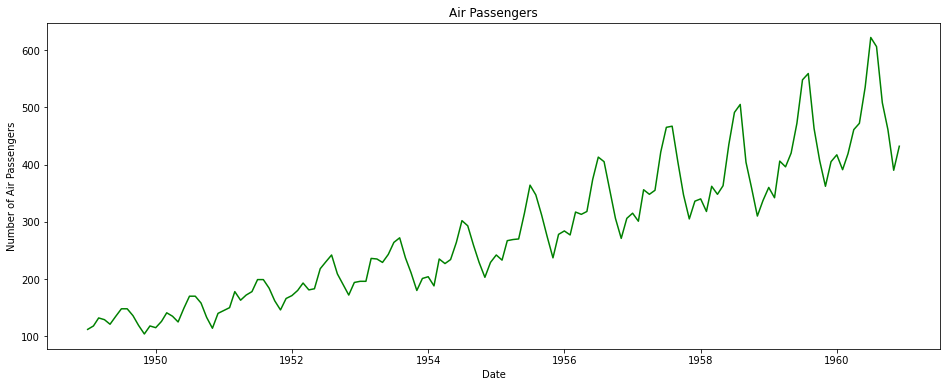

In [15]:
# Visualize the time series
plt.figure(figsize=(16,6))
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.plot(airline, color='green')

**Observation:**
Reviewing the plot of the time series, we can see that there is an obvious trend components, seasonality component with a cycle less than 12 months, and the variance in the dataset keeps increasing with time.

But first, lets split the dataset into train and test data.


In [16]:
# Split time series to train and test dataset 
split_train_test = 127
train, test = airline[0:split_train_test], airline[split_train_test:] # 127 for train, and 17 for test


In [17]:
train.dtypes

Num_of_Passengers    int64
dtype: object

In [18]:
train.head()

,Num_of_Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
test.head(1)


,Num_of_Passengers
Month,
1959-08-01,559


In [20]:
test.tail(1)

,Num_of_Passengers
Month,
1960-12-01,432


In [21]:
# Convert the date from string to datetime, it's time series!
train.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1958-10-01', '1958-11-01', '1958-12-01', '1959-01-01',
               '1959-02-01', '1959-03-01', '1959-04-01', '1959-05-01',
               '1959-06-01', '1959-07-01'],
              dtype='datetime64[ns]', name='Month', length=127, freq=None)

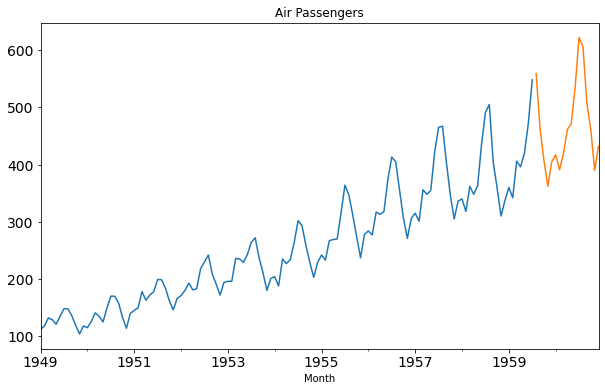

In [22]:
# Plotting data
train.Num_of_Passengers.plot(figsize=(10,6), title= 'Air Passengers', fontsize=14)
test.Num_of_Passengers.plot(figsize=(10,6), title= 'Air Passengers', fontsize=14)
plt.show()

### Step 2: Stationarize the Series
  - Differencing - calculate the difference between observations

  - Linear regression -include binary variable for the saesonal component

**Before that, lets establish a base level forecast**


####Establish a base level forecast
- Most base level forecasts do not require data stationarity.

**Let's take a look at different *base* models/technique and their performance that .** 

##### Naive Methods
These are simple estimation techniques. It assumes the predicted value at time ‘t’ to be the actual value of the variable at time ‘t-1’ or rolling mean of series. These are used for comparison with sophisticated modelling techniques


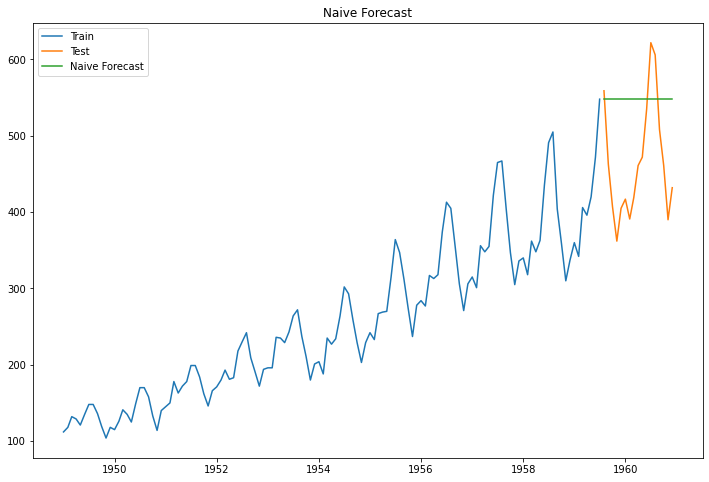

In [23]:
# Convert to array
dd= np.asarray(train.Num_of_Passengers)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Num_of_Passengers'], label='Train')
plt.plot(test.index, test['Num_of_Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [24]:
# Calculate RMSE to check to accuracy of our model on test data set
from sklearn.metrics import mean_squared_error
from math import sqrt
naive_rms = sqrt(mean_squared_error(test.Num_of_Passengers, y_hat.naive))
print(naive_rms)

111.31988882072612


With this basic technique, the error of any other model must go less than the basic model.


##### Moving Average

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values.

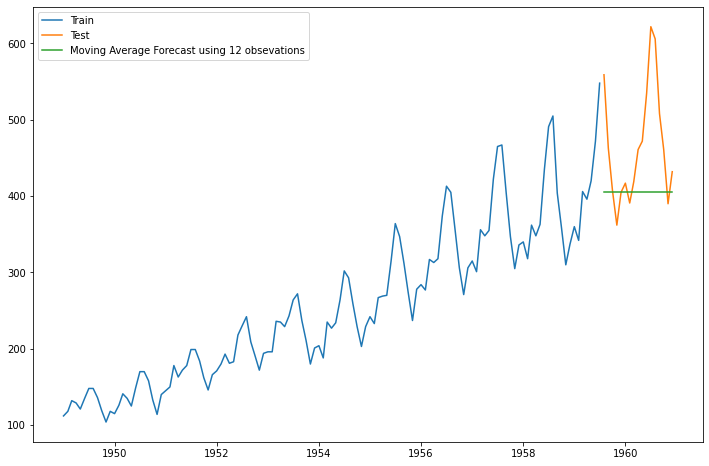

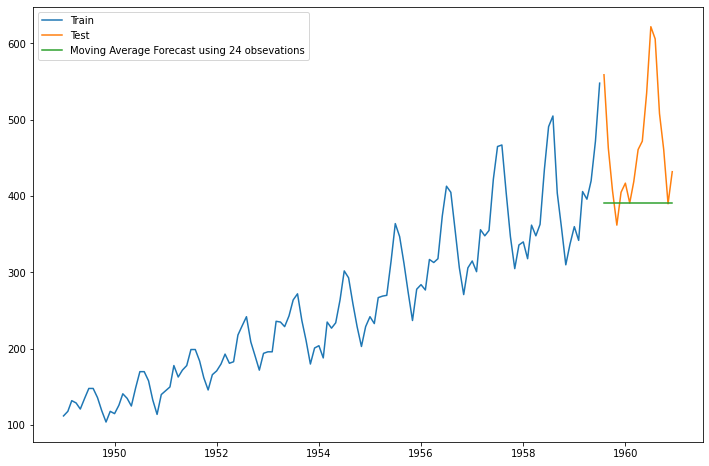

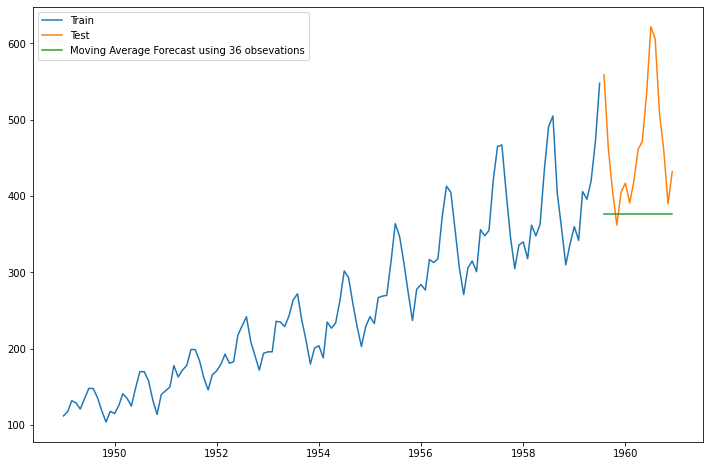

In [25]:
for i in range(12, 40, 12):
  y_hat_avg = test.copy()
  y_hat_avg['moving_avg_forecast'] = train['Num_of_Passengers'].rolling(i).mean().iloc[-1]
  plt.figure(figsize=(12,8))
  plt.plot(train['Num_of_Passengers'], label='Train')
  plt.plot(test['Num_of_Passengers'], label='Test')
  plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using %s obsevations' %i)
  plt.legend(loc='best')
  plt.show()

In [26]:
moving_rms = sqrt(mean_squared_error(test.Num_of_Passengers, y_hat_avg.moving_avg_forecast))
print(moving_rms)

115.36253046376726


We can see that the predictions are getting weaker as we increase the number of observation.

#####Simple Exponential Smoothing - Weighted

Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


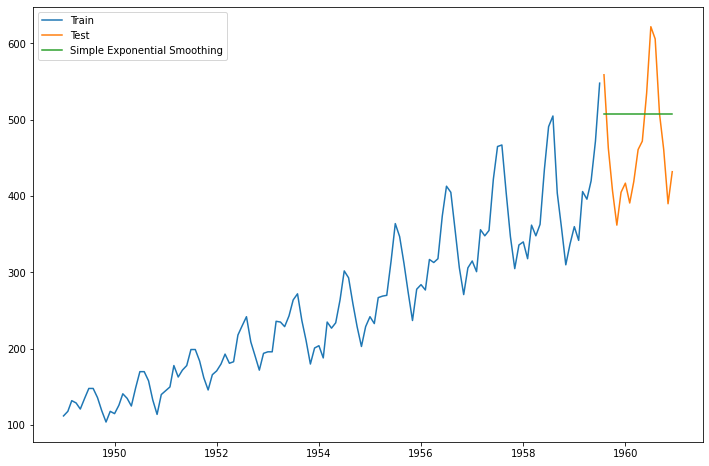

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Num_of_Passengers'])).fit(smoothing_level = 0.6, optimized = False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(12,8))
plt.plot(train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(y_hat_avg['SES'], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [28]:
SES_rms = sqrt(mean_squared_error(test.Num_of_Passengers, y_hat_avg.SES))
print(SES_rms)

85.57692633243465


We can infer that the fit of the model has improved as the rmse value has reduced.

##### Holt's Linear Trend Model

This is an extention of simple exponential smoothing to allow forecasting of data with trend. The forecast function in this method is a function of level and trend.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  


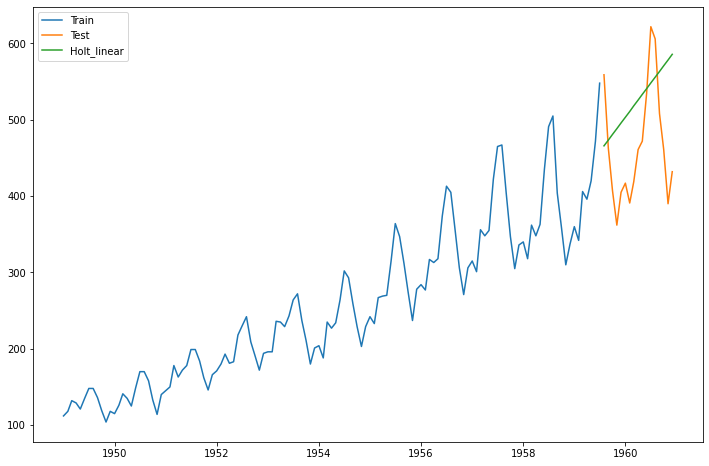

In [29]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Num_of_Passengers'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(12,8))
plt.plot(train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()



In [30]:
holtL_rms = sqrt(mean_squared_error(test.Num_of_Passengers, y_hat_avg.Holt_linear))
print(holtL_rms)

97.11118357773114


##### Holt-Winters Method

This model takes into account for trends and /or seasonality.

The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


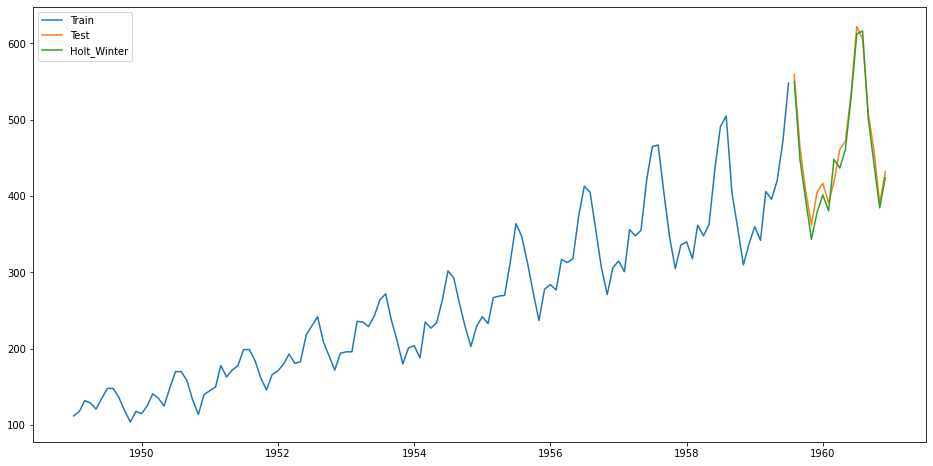

In [31]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Num_of_Passengers']) ,seasonal_periods=12 ,trend='mul', seasonal='mul',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [32]:
holtW_rms = sqrt(mean_squared_error(test.Num_of_Passengers, y_hat_avg.Holt_Winter))
print(holtW_rms)

15.567957508269036


In [33]:
print('RMS for Naive Method: %.4f'% naive_rms)
print('RMS for Moving Average: %.4f'% moving_rms)
print('RMS for Simple Exponential Smoothing: %.4f'% SES_rms)
print('RMS for Holts Linear: %.4f'% holtL_rms)
print('RMS for Holts Winters: %.4f'% holtW_rms)

RMS for Naive Method: 111.3199
RMS for Moving Average: 115.3625
RMS for Simple Exponential Smoothing: 85.5769
RMS for Holts Linear: 97.1112
RMS for Holts Winters: 15.5680


From the above results, clearly the rms value for Holts Winters Method is the least and so the best modelling technique.

**Next, lets check for stationarity.**


####  Checks for Stationarity 
Time series is stationary if its statistical properties, **mean, variance remain constant over time and an autovariance does not depend on time**.

- Rolling Statistics 
  - Plot and review the rolling statistics - Rolling average and standard deviation 
- Statistical Test 
    - Augmented Dickey–Fuller test (ADF Test) - confirmatory evidence that time series is stationary or non-stationary

      - Null hypothesis (H0)- the time series has a unit root, is **non-stationary**. It has **some time dependent structure**.

      - Alternate hypotheis (H1)- rejecting the null hypothesis -meaning the time series does not have a unit root,is **stationary**. It does **not have time-dependent structure**.

          - If 'Test Statistic' < 'Critical Value', reject the null hypothesis, the time series is stationary.  

          - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
          - p-value <= 0.05: Reject the null hypothesis (H1), the data does not have a unit root and is stationary.


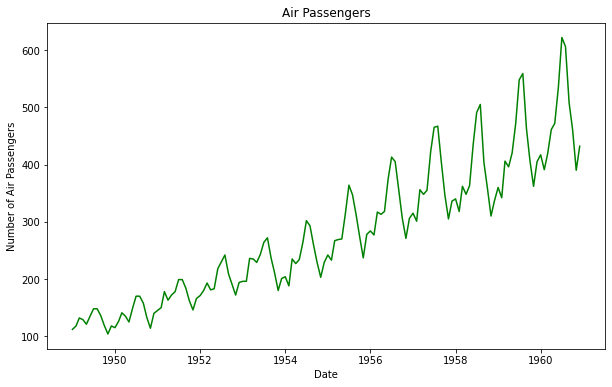

In [34]:
# Visualize the time series
plt.figure(figsize=(10,6))
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.plot(airline, color='green')

**Observation**: Reviewing the plot of the time series, we can see that there is an obvious trend components, seasonality component with a cycle less than 12 months, and the variance in the dataset keeps increasing with time.

So, two issues to address before we test stationary series. 

1.   Remove unequal variances by using log of the series.
2.   Address the trend component by taking difference of the series.


In [35]:
# Function to test stationarity 

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determine rolling statistics
    roll_mean = timeseries.rolling(window = 12).mean()
    roll_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistics
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(roll_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(roll_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()
    
    # Perform Augmented Dickey–Fuller test (ADF test)
    print('Results of Dickey-Fuller Test:')
    adf_test = adfuller(timeseries)
    adf_output = pd.Series(adf_test[0:4], index=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' %key] = value
    print(adf_output)

In [36]:
# For illustration purpose - Print the rolling mean and rolling standard deviation  
# Determine Rolling Statistics -  
# Window = 12 implies 12 months, this gives a rolling mean at yearly level, this will smoothen the curve  

# Rolling mean
roll_mean = airline.rolling(window=12).mean()

# Rolling standard deviation
roll_std = airline.rolling(window=12).std()
print(roll_mean, roll_std)

            Num_of_Passengers
Month                        
1949-01-01                NaN
1949-02-01                NaN
1949-03-01                NaN
1949-04-01                NaN
1949-05-01                NaN
...                       ...
1960-08-01         463.333333
1960-09-01         467.083333
1960-10-01         471.583333
1960-11-01         473.916667
1960-12-01         476.166667

[144 rows x 1 columns]             Num_of_Passengers
Month                        
1949-01-01                NaN
1949-02-01                NaN
1949-03-01                NaN
1949-04-01                NaN
1949-05-01                NaN
...                       ...
1960-08-01          83.630500
1960-09-01          84.617276
1960-10-01          82.541954
1960-11-01          79.502382
1960-12-01          77.737125

[144 rows x 1 columns]


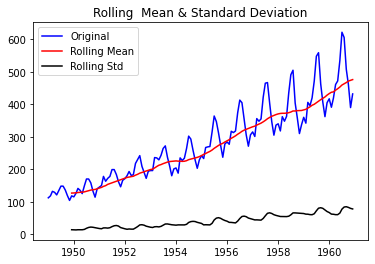

Results of Dickey-Fuller Test:
ADF Test Statistic               0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [37]:
# Call test_Stationary function that to determine the rolling statistics and run the Augmented Dickey–Fuller test
airline_ts = airline['Num_of_Passengers'] # original dataset
test_stationarity(airline_ts)

The mean and standard deviation values are not constant, both vary with time. 

From the result of the Dickey-Fuller test, the p-value is **greater** than 0.05 and the ADF Statistic value is **greater** than the the critical values, so we fail to reject the null hypothesis. This is a non stationary time series.

This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.


##### Estimate and Eliminate Trend

In [38]:
# Take the log transform of the series to scale to remove unequal variance 
# the expectations of this statistical test.
train_log = np.log(train['Num_of_Passengers']) 
test_log = np.log(test['Num_of_Passengers']) 


Let's take a look at some simple reduction trend techniques.


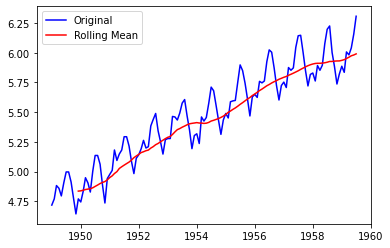

In [39]:
## 1. Transformation with Moving Average - Simple moving average
moving_avg = train_log.rolling(12).mean()
plt.plot(train_log, color = 'blue', label = 'Original')
plt.plot(moving_avg, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best'), 
plt.show()

We can observe an increasing trend in the plot. We need to remove the increasing trend in order to make the time series stationary. 

In [40]:
# Let's try difference with the log of the time series and the moving Average to see the output
train_log_moving_avg_diff = train_log - moving_avg



In [41]:
# Drop all null values
train_log_moving_avg_diff.dropna(inplace = True)
train_log_moving_avg_diff.head(10)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
Name: Num_of_Passengers, dtype: float64

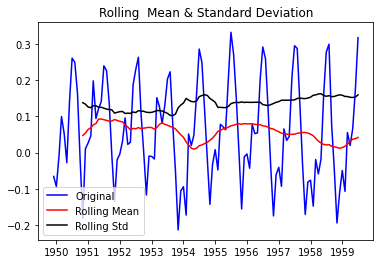

Results of Dickey-Fuller Test:
ADF Test Statistic              -2.925341
p-value                          0.042479
#Lags Used                      13.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


In [42]:
# Test for stationarity
test_stationarity(train_log_moving_avg_diff)

The rolling mean and standard deviation appear to vary **slightly**. This is much better than the original time series. 
The p-value is relatively less (0.03) compared to the initial value of (0.99).
The test statistic (-3.04) is **smaller** than 5% of the critical values, this means we can say that "with 95% confidence that trend is also removed.

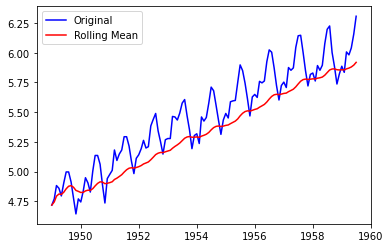

In [43]:
# 2. Transformation with exponentially weighted moving average
exp_weighted_moving_avg = train_log.ewm(halflife = 12).mean()
plt.plot(train_log, color = 'blue', label = 'Original')
plt.plot(exp_weighted_moving_avg, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best'), 
plt.show()

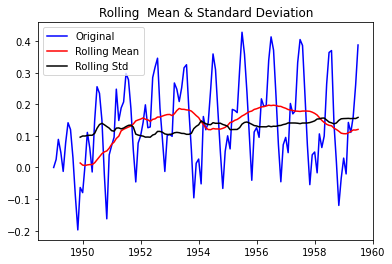

Results of Dickey-Fuller Test:
ADF Test Statistic              -3.329342
p-value                          0.013617
#Lags Used                      13.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [44]:
# Take the difference of the log of the time series and the exponential weighted moving average
exp_weighted_moving_avg_diff = train_log - exp_weighted_moving_avg

# Test for stationarity
test_stationarity(exp_weighted_moving_avg_diff)

The rolling mean and standard deviation has less variation in magnitude when compared with the log value.
The p-value is relatively less (0.013617). The test statistic (-3.601262) is smaller than 1% of the critical values, that means we can say that "with 99% confidence that this time series is stationary.

However, **simple trend reduction techniques** above **don’t work in cases**, particularly the ones with high seasonality like this.

To stabilize the mean of the time series, we can use the methods below to eliminate trends.

  1.   Differencing (take the difference with a particular time lag)
  2.   Decomposition (model both trend and seasonality and removing them from the model)

##### Eliminate Trend and Seasonality


######Differencing

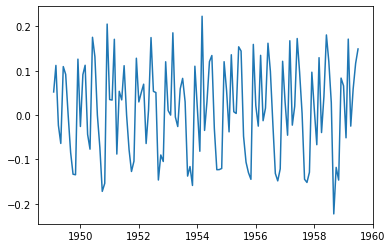

In [45]:
# Differencing to detrend trend
# Take the difference with a particular time lag
train_log_diffShift = train_log - train_log.shift()
plt.plot(train_log_diffShift)

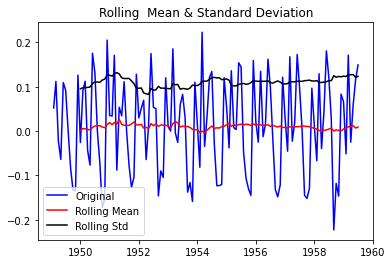

Results of Dickey-Fuller Test:
ADF Test Statistic              -2.797747
p-value                          0.058596
#Lags Used                      12.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [46]:
# Drop the null values
train_log_diffShift.dropna(inplace = True)
test_stationarity(train_log_diffShift)

Here, there is no trend, the output is quite flat. The test stastistic is less than 10% of the critical value, with 90% confidence that the time series is stationary. 

Next, we decompose the time series into trend and seasonality.

######Decomposing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


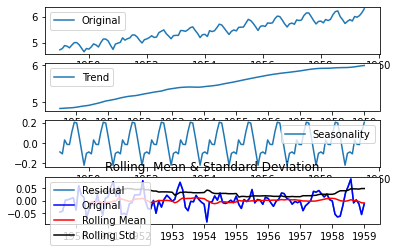

Results of Dickey-Fuller Test:
ADF Test Statistic            -6.554535e+00
p-value                        8.682794e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64


In [47]:
# Decompose and plot the time series 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_log, freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

train_log_decompose = residual
train_log_decompose.dropna(inplace = True)
test_stationarity(train_log_decompose)


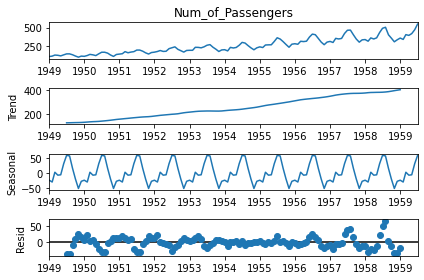

In [48]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['Num_of_Passengers']).plot()
result = sm.tsa.stattools.adfuller(train['Num_of_Passengers'])
plt.show()

Above, the original data, which shows the trend. 
The trendline is linear and is upward trending 
The seasonality shows a cycle of less 12 months pattern and the residual shows irregularity (noise) in the time series. It has not have a specific pattern.

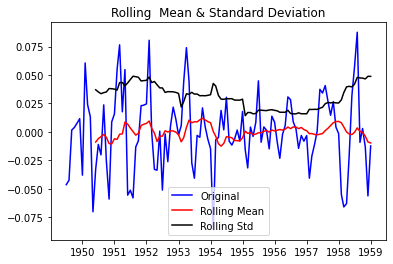

Results of Dickey-Fuller Test:
ADF Test Statistic            -6.554535e+00
p-value                        8.682794e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64


In [49]:
# Check if the residual or noise is stationary or not
train_log_decompose = residual
train_log_decompose.dropna(inplace = True)
test_stationarity(train_log_decompose)

The test statistic is significantly lower than the 1% critical value.

#### Step 3: Plot ACF & PACF & Find Optimal Parameters

In ARIMA, p is the parameter for AR, d for integration and q for MA 
To calculate q, we will plot ACF and for p, we plot PACF

- ACF - correlation between the observations at the current point in time and the observations at all previous points in time (a lagged version of itself)
E.g, at lag 5, ACF would compare series at time instant 't1'...'t2' with series at instant 't1-5'...'t2-5' (t1-5 and t2 being end points).

- PACF is a subset of ACF. It expresses the correlation between observations made at two points in time while accounting for any influence from other data points -E.g. at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

##### ARIMA Model - Auto Regressive Integrated Moving Average

  - The ARIMA forecasting equation for a stationary time series is a linear (i.e., regression-type) equation in which the predictors consist of lags of the dependent variable and/or lags of the forecast errors.

* ordered parameters (p, d q)

     - p  - order of autoregressive model (number of time lags)

  - d - degree of differencing (number of times the data have had past values substracted)

  - q - order of moving average model


In [50]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diffShift, nlags=20)
lag_pacf = pacf(train_log_diffShift, nlags=20, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


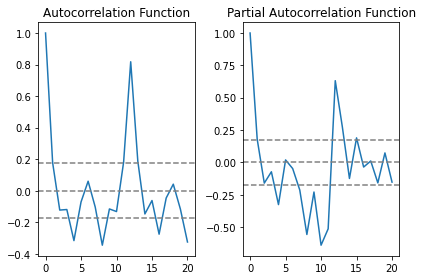

In [51]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(train_log_diffShift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train_log_diffShift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(train_log_diffShift)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train_log_diffShift)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() 


From the ACF plot, the curve cuts y=0.0 the first time at about x =2, that makes q parameter value=2.

Also, the PACF plot, the curve cuts y=0.0 the first time at about x = 2, that makes p parameter value=2. 
d=1

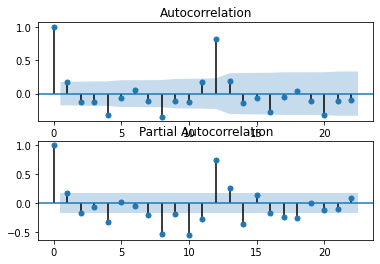

In [52]:
#Another method - ACF and PACF plots using plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(211)
plot_acf(train_log_diffShift, ax=plt.gca()) # gca() - Get Current Axes -to get a reference to the current axes
plt.subplot(212)
plot_pacf(train_log_diffShift, ax=plt.gca())
plt.show()

From the graph, it shows that 2nd above the critical values

#### Step 4: Build Model

##### AR Model




Next, we fit the ARIMA model to find the optimed value of p, d, q parameters.
We already know the value of d (differencing which is 1).
Now we need to find out the value of p and q.



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Ploting AR Model


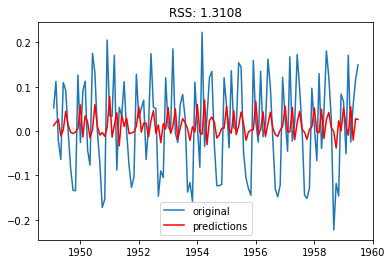

In [53]:
# AR Model - specifies that the output variable depends linearly on its own previous values.
# The q value = 0 for AR model
import warnings
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
model = ARIMA(train_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(train_log_diffShift.dropna(), label ='original')
plt.plot(results_AR.fittedvalues, color = 'red', label='predictions')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - train_log_diffShift)**2)) #Residual sum of squares
print('Ploting AR Model')
plt.legend(loc='best')
plt.show()

In [54]:
test.head(1), test.tail(1)

(            Num_of_Passengers
 Month                        
 1959-08-01                559,             Num_of_Passengers
 Month                        
 1960-12-01                432)

Ploting AR Model


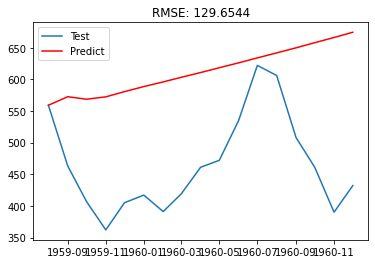

In [55]:
# Find the predictions for the fitted values - plot the validation curve for AR model
AR_predict = results_AR.predict(start = '1959-08-01' , end= '1960-12-01')
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(test.shape[0]) * np.log(test['Num_of_Passengers'])[0], index = test.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value = 0)
AR_predict = np.exp(AR_predict1)

plt.plot(test['Num_of_Passengers'], label ='Test')
plt.plot(AR_predict, color = 'red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test['Num_of_Passengers']))/test.shape[0]))
print('Ploting AR Model')

##### MA Model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Text(0.5, 1.0, 'RSS: 1.2812')

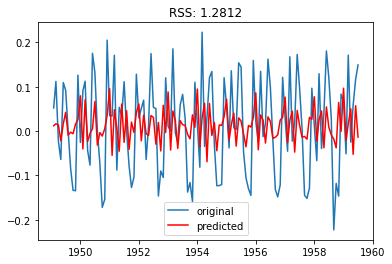

In [56]:
###  MA Model p = 0 in MA model
import warnings
model = ARIMA(train_log, order= (0, 1, 2))  
results_MA = model.fit(disp = -1)  
plt.plot(train_log_diffShift.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color= 'red', label='predicted')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - train_log_diffShift)**2))

Ploting MA Model


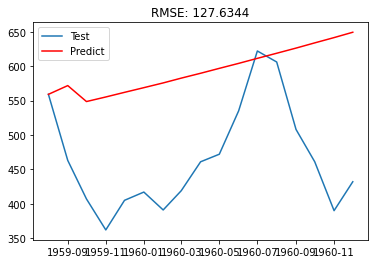

In [57]:
# Find the predictions for the fitted values - - plot the validation curve for MA model
MA_predict = results_MA.predict(start = '1959-08-01' , end= '1960-12-01')
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(test.shape[0]) * np.log(test['Num_of_Passengers'])[0], index = test.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value = 0)
MA_predict = np.exp(MA_predict1)

plt.plot(test['Num_of_Passengers'], label ='Test')
plt.plot(MA_predict, color = 'red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, test['Num_of_Passengers']))/test.shape[0]))
print('Ploting MA Model')

##### ARIMA Model AR + I + MA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

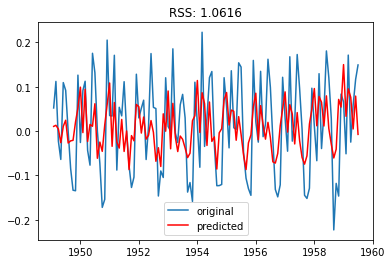

In [58]:
# Combined Model=> AR + I + MA
import warnings
model = ARIMA(train_log, order = (2, 1, 2))  
results_ARIMA = model.fit(disp = -1)  
plt.plot(train_log_diffShift.dropna(), label = 'original')
plt.plot(results_ARIMA.fittedvalues, color= 'red', label='predicted')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - train_log_diffShift)**2))
plt.show()

Here the combined model of AR and MA gave the best RSS result. We can scale back to the original values to see how it performs.

Ploting ARIMA Model


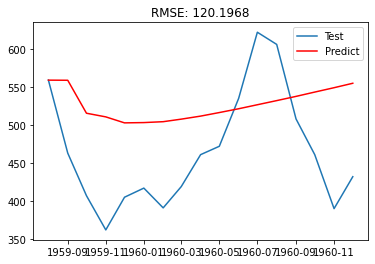

In [59]:
# Find the predictions for the fitted values 
ARIMA_predict = results_ARIMA.predict(start = '1959-08-01' , end= '1960-12-01')
ARIMA_predict = ARIMA_predict.cumsum().shift().fillna(0)
ARIMA_predict1 = pd.Series(np.ones(test.shape[0]) * np.log(test['Num_of_Passengers'])[0], index = test.index)
ARIMA_predict1 = ARIMA_predict1.add(ARIMA_predict, fill_value = 0)
ARIMA_predict = np.exp(ARIMA_predict1)

plt.plot(test['Num_of_Passengers'], label ='Test')
plt.plot(ARIMA_predict, color = 'red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(ARIMA_predict, test['Num_of_Passengers']))/test.shape[0]))
print('Ploting ARIMA Model')

In [60]:
print(results_ARIMA.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Num_of_Passengers   No. Observations:                  126
Model:                  ARIMA(2, 1, 2)   Log Likelihood                 121.882
Method:                        css-mle   S.D. of innovations              0.091
Date:                 Tue, 01 Sep 2020   AIC                           -231.764
Time:                         06:20:35   BIC                           -214.746
Sample:                     02-01-1949   HQIC                          -224.850
                          - 07-01-1959                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0106      0.001     15.837      0.000       0.009       0.012
ar.L1.D.Num_of_Passengers     0.1895      0.184      1.029      0.303      -0.

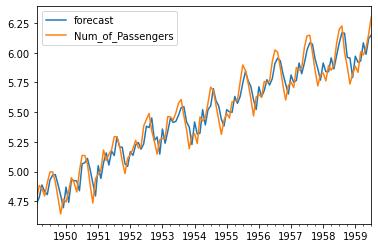

<Figure size 1440x1152 with 0 Axes>

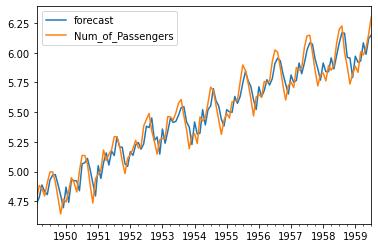

In [61]:
# Check accuracy of the model
plt.figure(figsize=(20,16))
results_ARIMA.plot_predict()

Predictions and Reverse Transformation

In [62]:
# Convert the fitted values into series format and store the predicted results
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.010605
1949-03-01    0.013048
1949-04-01    0.004636
1949-05-01   -0.026103
1949-06-01    0.010823
dtype: float64

In [63]:
# Find the cumulative sum (Convert the differencing to log scale by adding these differences consecutively to the base number)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.010605
1949-03-01    0.023653
1949-04-01    0.028289
1949-05-01    0.002186
1949-06-01    0.013008
dtype: float64

In [64]:
# Find the predictions for the fitted values 
predictions_ARIMA_log = pd.Series(train_log.iloc[0], index=train_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.729104
1949-03-01    4.742152
1949-04-01    4.746788
1949-05-01    4.720685
dtype: float64

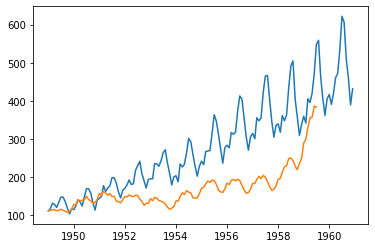

In [65]:
# Calculate the exponential of the value to get the data in the original data
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(airline)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - airline)**2)/len(airline))) #>>>>>>> i am getting error here

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


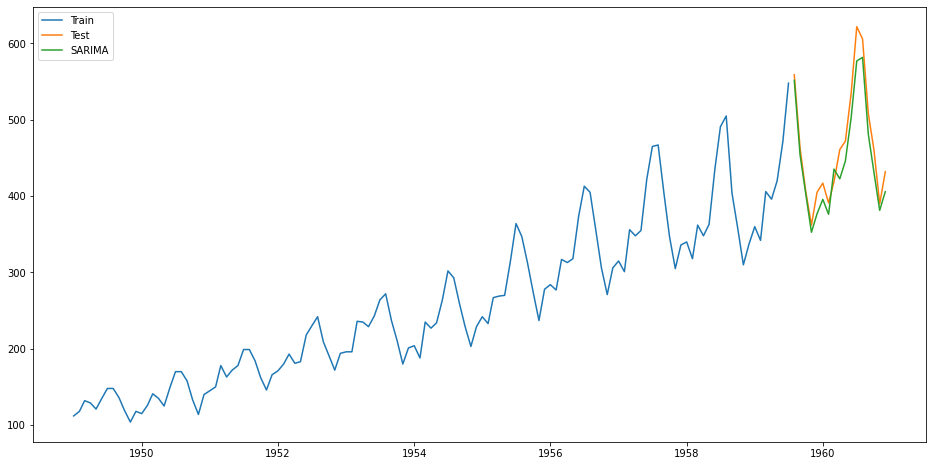

In [66]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Num_of_Passengers, order=(2, 1, 2),seasonal_order=(1,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start = '1959-08-01' , end= '1960-12-01', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [67]:
# Print the dataset
train_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1959-03-01    6.006353
1959-04-01    5.981414
1959-05-01    6.040255
1959-06-01    6.156979
1959-07-01    6.306275
Name: Num_of_Passengers, Length: 127, dtype: float64

#### Step 5: Forecasting a Time Series

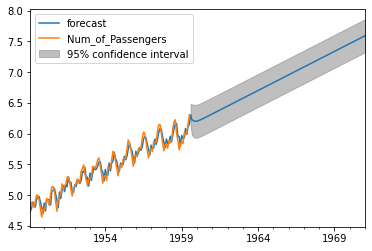

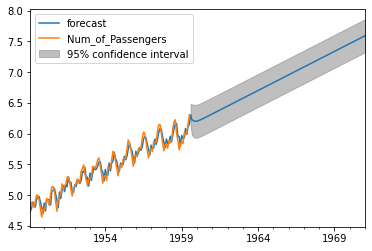

In [68]:
# Forcast for next 10 years
results_ARIMA.plot_predict(1,264)


### SARIMAX

1. Parameter Selection for the ARIMA Time Series Model

In [69]:
# Take the log transform of the series to scale to remove unequal variance 
airline_log = np.log(airline['Num_of_Passengers']) 

In [70]:
import itertools
p = d = q = range(2) # I would like to increase this to 3 and capture the aic in a list to find the lowest value. help!
pdq = list(itertools.product(p, d, q))      #Generate all different combinations of p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]       #Generate all different combinations of seasonal p, q and q triplet

In [72]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")           #Specify to ignore warning messages
#AIC_df = pd.DataFrame({}, columns = ['param', 'param_seasonal', 'AIC'])
metric_aic_dict = dict()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(airline_log, order = param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            
            print('ARIMA{}x{}-AIC:{}'.format(param, param_seasonal, results.aic))
            #AIC_df.append([param, param_seasonal, results.aic])
            metric_aic_dict.update({(param, param_seasonal, results.aic)})
            
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)-AIC:898.7367486840988
ARIMA(0, 0, 0)x(0, 0, 1, 12)-AIC:687.3749017314517
ARIMA(0, 0, 0)x(0, 1, 0, 12)-AIC:-150.62577301420401
ARIMA(0, 0, 0)x(0, 1, 1, 12)-AIC:-179.2412297405511
ARIMA(0, 0, 0)x(1, 0, 0, 12)-AIC:-344.53629719317615
ARIMA(0, 0, 0)x(1, 0, 1, 12)-AIC:-342.6089190943791
ARIMA(0, 0, 0)x(1, 1, 0, 12)-AIC:-225.90869150521553
ARIMA(0, 0, 0)x(1, 1, 1, 12)-AIC:-301.46045604657616
ARIMA(0, 0, 1)x(0, 0, 0, 12)-AIC:704.0097395065307
ARIMA(0, 0, 1)x(0, 0, 1, 12)-AIC:509.2224730088748
ARIMA(0, 0, 1)x(0, 1, 0, 12)-AIC:-254.34077342089364
ARIMA(0, 0, 1)x(0, 1, 1, 12)-AIC:-248.4223167697349
ARIMA(0, 0, 1)x(1, 0, 0, 12)-AIC:-396.27944663110634
ARIMA(0, 0, 1)x(1, 0, 1, 12)-AIC:-395.7137229926908
ARIMA(0, 0, 1)x(1, 1, 0, 12)-AIC:-271.43123140879686
ARIMA(0, 0, 1)x(1, 1, 1, 12)-AIC:-339.499284453848
ARIMA(0, 1, 0)x(0, 0, 0, 12)-AIC:-230.04132958357417
ARIMA(0, 1, 0)x(0, 0, 1, 12)-AIC:-296.9570921223847
ARIMA(0, 1, 0)x(0, 1, 0, 12)-AIC:-431.23091802488267
ARIMA(0,

In [73]:
#I want to get the lowest aic from the dict i created, oh, it looks like nothing is inside it.....help!
metric_aic_dict


{}

In [74]:
# Sort, so we know the lowest item
{k:v for k, v in sorted(metric_aic_dict.items(), key =lambda x: x[1])}

{}

2. Fitting an ARIMA Time Series Model

In [75]:
#min_aic = AIC_df.sort_values(by = 'AIC').iloc[0]    #Row with minimum AIC value
#model = sm.tsa.statespace.SARIMAX(airline_log, order = min_aic.param, seasonal_order = min_aic.param_seasonal, enforce_stationarity = False, enforce_invertibility = False)

model = sm.tsa.statespace.SARIMAX(airline_log, order = (1,1,1), seasonal_order = (1,0,1,12), enforce_stationarity = False, enforce_invertibility = False)

results = model.fit()
print(results.summary())
#print(results.summary().tables[1])


                                     SARIMAX Results                                      
Dep. Variable:                  Num_of_Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 240.567
Date:                            Tue, 01 Sep 2020   AIC                           -471.133
Time:                                    06:21:10   BIC                           -456.834
Sample:                                01-01-1949   HQIC                          -465.323
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1897      0.197      0.961      0.337      -0.197       0.577
ma.L1         -0.5839      0.173   

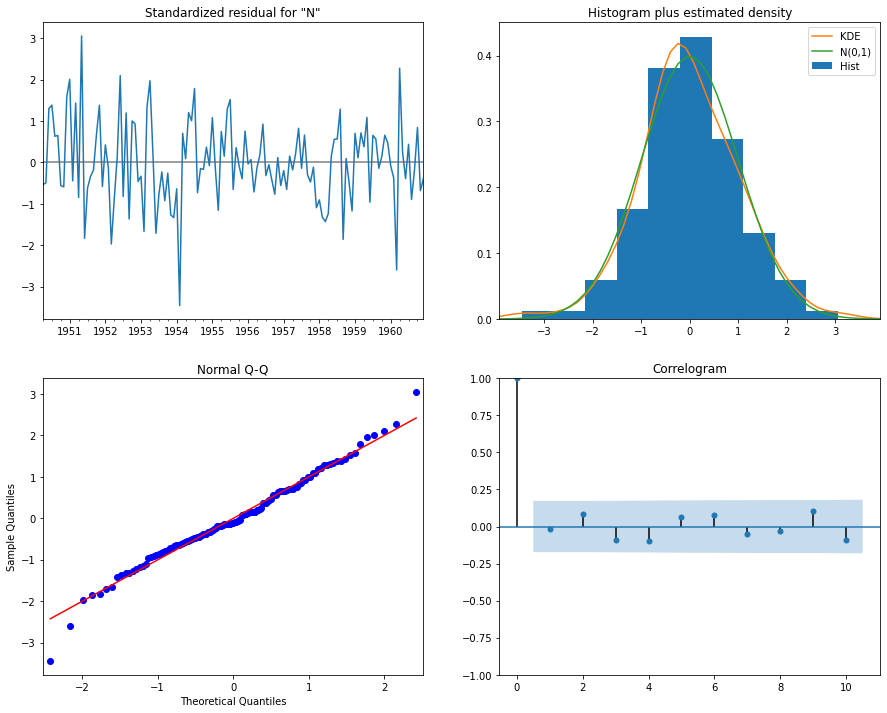

In [76]:
results.plot_diagnostics(figsize=(15, 12))    #Generate model diagnostics and investigate for any unusual behavior.
plt.show()

3. Validating Forecasts

In [77]:
#Obtain values for forecasts of the time series from 1958
pred = results.get_prediction(start = pd.to_datetime('1958-01-01'), dynamic = False)
#Obtain associated confidence intervals for forecasts of the time series
pred_ci = pred.conf_int()
pred_ci.head()

,lower Num_of_Passengers,upper Num_of_Passengers
1958-01-01,5.790067,5.934341
1958-02-01,5.738531,5.882803
1958-03-01,5.872094,6.016364
1958-04-01,5.825534,5.969803
1958-05-01,5.816905,5.961174


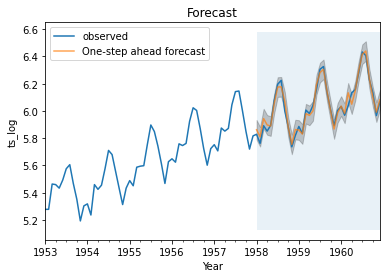

In [78]:
#Plot the forecasted values with historical data
ax = airline_log['1953':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead forecast', alpha = 0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), airline_log.index[-1], alpha = .1, zorder = -1)
plt.xlabel('Year')
plt.ylabel('ts_log')
plt.title('Forecast')
plt.legend()

In [79]:
pred.predicted_mean.head()

1958-01-01    5.862204
1958-02-01    5.810667
1958-03-01    5.944229
1958-04-01    5.897669
1958-05-01    5.889040
Freq: MS, Name: predicted_mean, dtype: float64

In [80]:
airline_log_forecasted = pred.predicted_mean     #From 1958 to 1960 (validation process)
airline_log_original = airline_log['1958-01-01':]
mse = ((airline_log_forecasted - airline_log_original) ** 2).mean()  #Mean square error
print('Mean Squared Error of forecast : {}'.format(round(mse,3)))

Mean Squared Error of forecast : 0.001


In [81]:
pred_dynamic = results.get_prediction(start = pd.to_datetime('1958-01-01'), dynamic = True, full_results = True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci.head()

,lower Num_of_Passengers,upper Num_of_Passengers
1958-01-01,5.790067,5.934341
1958-02-01,5.746475,5.915158
1958-03-01,5.898711,6.083978
1958-04-01,5.872680,6.072389
1958-05-01,5.880219,6.093259


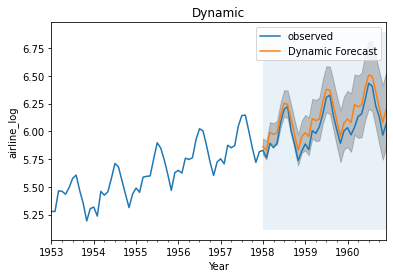

In [82]:
ax = airline_log['1953':].plot(label = 'observed')
pred_dynamic.predicted_mean.plot(ax = ax, label = 'Dynamic Forecast')
ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), airline_log.index[-1], alpha = .1, zorder = -1)
plt.xlabel('Year')
plt.ylabel('airline_log')
plt.title('Dynamic')
plt.legend()

In [83]:
airline_log_forecasted_dyna = pred_dynamic.predicted_mean
airline_log_truevalue = airline_log['1958-01-01':]
mse = ((airline_log_forecasted_dyna - airline_log_truevalue) ** 2).mean()
print('Mean Squared Error of forecast : {}'.format(round(mse, 3)))

Mean Squared Error of forecast : 0.01


4. Producing and Visualizing Forecasts

In [84]:
pred_uc = results.get_forecast(steps=100)     #Get forecast 100 steps ahead in future (ts_log)
pred_ci = pred_uc.conf_int()                  #Get confidence intervals of forecasts (ts_log)
pred_ci.head()

,lower Num_of_Passengers,upper Num_of_Passengers
1961-01-01,6.039579,6.183845
1961-02-01,5.971987,6.140663
1961-03-01,6.085764,6.271023
1961-04-01,6.104245,6.303947
1961-05-01,6.131165,6.344198


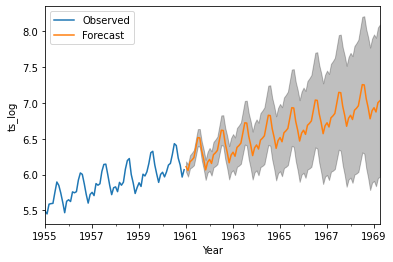

In [85]:
ax = airline_log['1955':].plot(label='Observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('ts_log')
plt.legend(loc = 'upper left')
plt.show()

Back to original data

In [86]:
#Take exponential function
pred_uc = np.exp(pred_uc.predicted_mean)
pred_ci = np.exp(pred_ci)

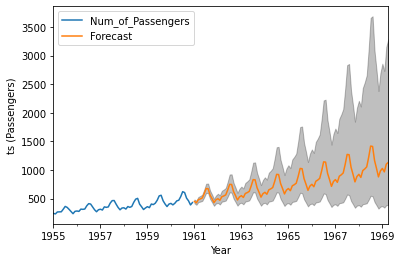

In [87]:
#Plot original data prediction
ax = airline['1955':].plot(label='Observed')
pred_uc.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('ts (Passengers)')
plt.legend(loc = 'upper left')
plt.show()

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/